# CNN's

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
tf.random.set_seed(42)

In [20]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "course_data/pizza_steak/train/"
test_dir = "course_data/pizza_steak/test/"

In [21]:
# import data and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
# create the model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid') # for binary classification problems 
])

# compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
)

# fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5


2022-04-02 00:45:35.430580: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


47/47 [==============================] - 14s 138ms/step - loss: 0.6129 - accuracy: 0.7033 - val_loss: 0.4878 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4348 - accuracy: 0.8013 - val_loss: 0.3987 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3873 - accuracy: 0.8333 - val_loss: 0.3300 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3579 - accuracy: 0.8447 - val_loss: 0.3012 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 6s 116ms/step - loss: 0.3155 - accuracy: 0.8773 - val_loss: 0.2975 - val_accuracy: 0.8860


In [11]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [12]:
# previous model
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 119ms/step - loss: 0.9940 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [13]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [14]:
# extension of model_2, with more neurons in the hidden layer as well as more layers 
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 121ms/step - loss: 3.2841 - accuracy: 0.6320 - val_loss: 0.5492 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 1.4311 - accuracy: 0.6833 - val_loss: 0.6603 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.9074 - accuracy: 0.7460 - val_loss: 0.5092 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6941 - accuracy: 0.7400 - val_loss: 1.0936 - val_accuracy: 0.6820
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4682 - accuracy: 0.8113 - val_loss: 0.4385 - val_accuracy: 0.7880


In [15]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


you can see the power of CNNs compared to ANN by observing the number of parameters needed in a traditional ANN models compared to CNN's. CNN's are able to do more with far less parameters to learn.

# Binary Classification: breakdown

Generally, we want our beginner model to follow this paradigm:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

```

In [17]:
# try creating a mini model with 3 layers

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
)

In [22]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 125ms/step - loss: 1.4253 - accuracy: 0.6513 - val_loss: 0.5072 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4193 - accuracy: 0.8193 - val_loss: 0.4480 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 6s 116ms/step - loss: 0.3309 - accuracy: 0.8767 - val_loss: 0.4083 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.2005 - accuracy: 0.9347 - val_loss: 0.5056 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.0920 - accuracy: 0.9787 - val_loss: 0.4067 - val_accuracy: 0.8340


<AxesSubplot:>

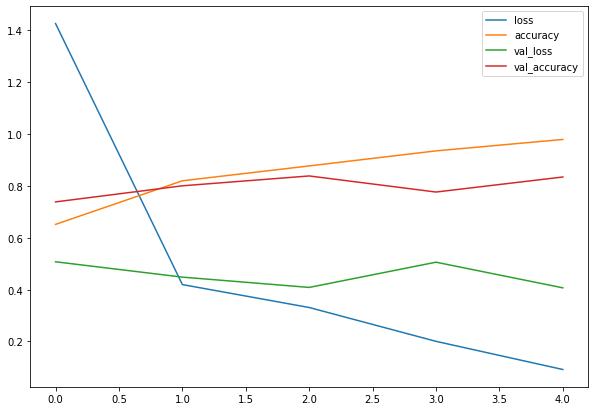

In [23]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

We see evidences of "overfitting", this can be observed by an increasing 'val_loss'

In [24]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

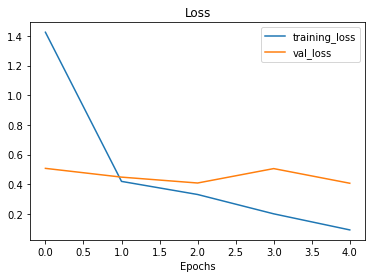

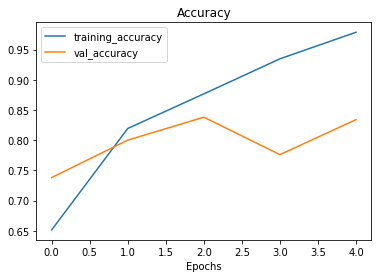

In [27]:
plot_loss_curves(history_4)

One way to prevent overfitting in Computer Vision is to add data augmentation

In [28]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [29]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [36]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 375ms/step - loss: 0.7889 - accuracy: 0.4027 - val_loss: 0.6864 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 17s 370ms/step - loss: 0.6912 - accuracy: 0.4987 - val_loss: 0.6802 - val_accuracy: 0.5200
Epoch 3/5
47/47 [==============================] - 18s 375ms/step - loss: 0.6894 - accuracy: 0.5693 - val_loss: 0.6768 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 17s 369ms/step - loss: 0.6829 - accuracy: 0.5840 - val_loss: 0.6717 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 18s 372ms/step - loss: 0.6665 - accuracy: 0.6080 - val_loss: 0.6154 - val_accuracy: 0.7560


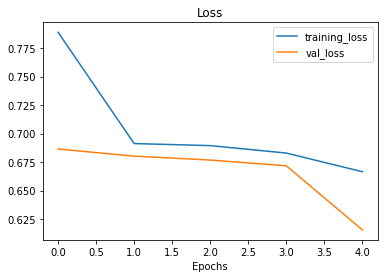

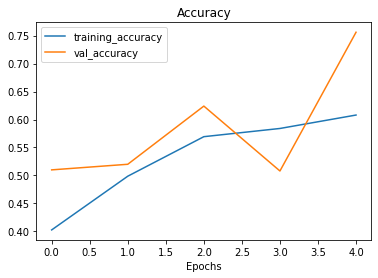

In [37]:
plot_loss_curves(history_6)

In [38]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 376ms/step - loss: 0.6458 - accuracy: 0.6273 - val_loss: 0.5004 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 17s 370ms/step - loss: 0.5299 - accuracy: 0.7493 - val_loss: 0.4126 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 17s 371ms/step - loss: 0.4934 - accuracy: 0.7707 - val_loss: 0.3471 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 18s 373ms/step - loss: 0.4676 - accuracy: 0.7927 - val_loss: 0.3988 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 17s 366ms/step - loss: 0.4748 - accuracy: 0.7833 - val_loss: 0.3384 - val_accuracy: 0.8840


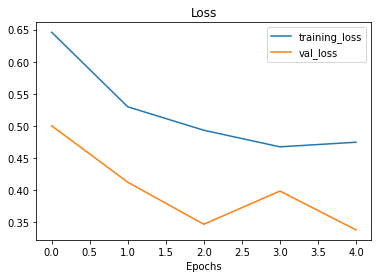

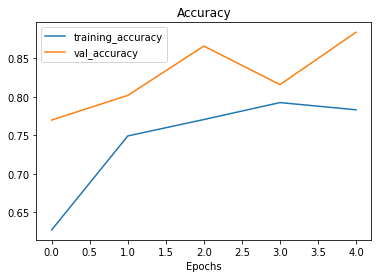

In [39]:
plot_loss_curves(history_7)

## Tactics for improving model performance

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

In [40]:
# trying to train for more epochs

# baseline 5 epochs
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 377ms/step - loss: 0.6172 - accuracy: 0.6580 - val_loss: 0.6368 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 18s 374ms/step - loss: 0.5189 - accuracy: 0.7440 - val_loss: 0.3887 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 17s 369ms/step - loss: 0.4910 - accuracy: 0.7720 - val_loss: 0.4051 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 17s 368ms/step - loss: 0.5312 - accuracy: 0.7400 - val_loss: 0.3847 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 17s 371ms/step - loss: 0.4801 - accuracy: 0.7673 - val_loss: 0.3306 - val_accuracy: 0.8560


In [42]:
# experiment: 10 epochs
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 18s 376ms/step - loss: 0.6275 - accuracy: 0.6467 - val_loss: 0.4290 - val_accuracy: 0.8060
Epoch 2/10
47/47 [==============================] - 18s 379ms/step - loss: 0.5183 - accuracy: 0.7533 - val_loss: 0.3913 - val_accuracy: 0.8340
Epoch 3/10
47/47 [==============================] - 17s 368ms/step - loss: 0.4744 - accuracy: 0.7840 - val_loss: 0.3579 - val_accuracy: 0.8540
Epoch 4/10
47/47 [==============================] - 18s 376ms/step - loss: 0.4602 - accuracy: 0.7853 - val_loss: 0.3536 - val_accuracy: 0.8440
Epoch 5/10
47/47 [==============================] - 17s 371ms/step - loss: 0.4548 - accuracy: 0.7853 - val_loss: 0.3311 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 17s 369ms/step - loss: 0.4601 - accuracy: 0.8000 - val_loss: 0.5979 - val_accuracy: 0.7320
Epoch 7/10
47/47 [==============================] - 17s 368ms/step - loss: 0.4353 - accuracy: 0.8113 - val_loss: 0.3058 - val_accuracy: 0.8720

Observation: accuracy does not seem to go over the ~81% mark. There is about a 5% accuracy improvement from the 5 epoch model. This seems to mean that we are overfitting our model. Try adding dropouts and see if it helps.


In [43]:
from tensorflow.keras.layers import Dropout

# experiment: 10 epochs with dropouts
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Dropout(0.5),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Dropout(0.5),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 18s 380ms/step - loss: 0.6441 - accuracy: 0.6447 - val_loss: 0.6300 - val_accuracy: 0.6980
Epoch 2/10
47/47 [==============================] - 18s 373ms/step - loss: 0.5650 - accuracy: 0.7193 - val_loss: 0.6028 - val_accuracy: 0.7300
Epoch 3/10
47/47 [==============================] - 17s 366ms/step - loss: 0.5727 - accuracy: 0.7053 - val_loss: 0.6156 - val_accuracy: 0.7440
Epoch 4/10
47/47 [==============================] - 18s 373ms/step - loss: 0.5466 - accuracy: 0.7267 - val_loss: 0.5981 - val_accuracy: 0.7760
Epoch 5/10
47/47 [==============================] - 18s 374ms/step - loss: 0.5591 - accuracy: 0.7147 - val_loss: 0.6116 - val_accuracy: 0.7580
Epoch 6/10
47/47 [==============================] - 17s 372ms/step - loss: 0.5322 - accuracy: 0.7260 - val_loss: 0.5911 - val_accuracy: 0.7620
Epoch 7/10
47/47 [==============================] - 18s 393ms/step - loss: 0.5444 - accuracy: 0.7287 - val_loss: 0.6583 - val_accuracy: 0.6060

That did not help! Need to think about how to improve accuracy

## Multiclass Classification

In [44]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-02 02:23:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 142.251.45.112, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.7MB/s    in 22s     

2022-04-02 02:23:35 (22.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [45]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [46]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [49]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 27s 112ms/step - loss: 2.0972 - accuracy: 0.2443 - val_loss: 1.9327 - val_accuracy: 0.3100
Epoch 2/5
235/235 [==============================] - 27s 114ms/step - loss: 1.8309 - accuracy: 0.3677 - val_loss: 1.8687 - val_accuracy: 0.3560
Epoch 3/5
235/235 [==============================] - 26s 112ms/step - loss: 1.5488 - accuracy: 0.4839 - val_loss: 1.8706 - val_accuracy: 0.3536
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 1.0079 - accuracy: 0.6695 - val_loss: 2.2690 - val_accuracy: 0.2884
Epoch 5/5
235/235 [==============================] - 27s 113ms/step - loss: 0.4879 - accuracy: 0.8529 - val_loss: 3.1557 - val_accuracy: 0.2880
